# **Projet de programmation mathématique avancée**
## **- Kidney exchange problem -**
### Anna Kerebel, Hiba Shaimed, Kefan Sun, Victor Klötzer, Vinh Nguyen

 *14 mai 2021*

---

1. bla
2. blabla

$\phantom{saut de ligne}$

Dans ce projet, on s'intéresse à blablabla.

In [1]:
# Pakages utilisés
using JuMP 
using Gurobi
using DelimitedFiles
using LightGraphs
using MetaGraphs
using NBInclude
const GUROBI_ENV = Gurobi.Env()
using Plots
const ϵ = 0.00001

Academic license - for non-commercial use only - expires 2021-06-25


┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


1.0e-5

In [30]:
# Importation des autres fonctions

@nbinclude("01_data.ipynb")
@nbinclude("02_node.ipynb")
@nbinclude("03_master.ipynb")
@nbinclude("04_subproblem.ipynb")
@nbinclude("05_branch_and_price.ipynb")
@nbinclude("06_MIP.ipynb")
@nbinclude("07_comparaison.ipynb")

compare (generic function with 1 method)

In [3]:
# Présentation des données

#=
https://juliagraphs.org/LightGraphs.jl/v1.1/pathing.html#Cycle-Detection-1
=#

data_folder = string(join(split(@__DIR__, '\\')[1:end-1],'\\'),"\\data")
instance = "MD-00001-00000113"
wmd_file = joinpath(data_folder, join([instance, ".wmd"]))
dat_file = joinpath(data_folder, join([instance, ".dat"]))
global GRAPH = read_graph(wmd_file, dat_file)
global VERTICES = 1:nv(GRAPH)
global EDGES = [(e.src,e.dst) for e in edges(GRAPH)]
global L = 3
global WEIGHTS = Dict{Tuple{Int,Int},Float32}((e.src,e.dst) => get_prop(GRAPH, e, :weight) for e in edges(GRAPH));

# À revoir
println("Nombre de couples donneur/receveur          : $(nv(GRAPH))")
println("Nombre d'arcs                               : $(ne(GRAPH))")
println("Longueur maximale autorisée pour les cycles : $L")

********* Read instance MD-00001-00000113 *********
Nombre de couples donneur/receveur          : 128
Nombre d'arcs                               : 3684
Longueur maximale autorisée pour les cycles : 3


In [4]:
list_cycles = KEP_heuristic()
primal_bound = 0
for c in list_cycles
    primal_bound += length(c)-1
end
primal_bound

57

In [5]:
result_MIP = @timed solve_MIP()

Academic license - for non-commercial use only - expires 2021-06-25
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 128 rows, 6870 columns and 20195 nonzeros
Model fingerprint: 0xb3c3783d
Variable types: 0 continuous, 6870 integer (6870 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 59.0000000
Presolve removed 11 rows and 1215 columns
Presolve time: 0.06s
Presolved: 117 rows, 5655 columns, 16615 nonzeros
Variable types: 0 continuous, 5655 integer (5655 binary)

Root relaxation: objective 7.800000e+01, 342 iterations, 0.02 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0      78.0000000   78.

(value = (78.0, [-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0  …  -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]), time = 15.350975801, bytes = 2095757147, gctime = 1.014769701, gcstats = Base.GC_Diff(2095757147, 30, 0, 38939315, 5977, 0, 1014769701, 24, 1))

In [10]:
global BP_INIT_VERSION   = "heuristique"        # Choisir "artificielle" ou "heuristique"
global BRANCHING_VERSION = "sur_sommets"        # Choisir "sur_arcs" ou "sur_sommets"
global PROCESSING_RULE   = "profondeur"         # Choisir "profondeur", "largeur" ou "meilleur_d_abord"
global SHOW_ADDED_CYCLES = false                # affichage ou non des cycles
result = @timed solve_BP()

Liste des noeuds qu'il reste à traiter : [1]
NOEUD n°1 :
 |  Meilleure solution réalisable (entière) de valeur 57.0 trouvée 
 |  Meilleure solution réalisable (entière) de valeur 58.0 trouvée 
 |  Meilleure solution réalisable (entière) de valeur 60.0 trouvée 
 |  Meilleure solution réalisable (entière) de valeur 62.0 trouvée 
 |  Meilleure solution réalisable (entière) de valeur 63.0 trouvée 
 |  Meilleure solution réalisable (entière) de valeur 64.0 trouvée 
 |  Meilleure solution réalisable (entière) de valeur 68.0 trouvée 
 |  Meilleure solution réalisable (entière) de valeur 69.0 trouvée 
 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure : 78.0
 |                                               et la borne supérieure : 78.0
Deux noeuds sont créés en branchant sur y_1 == y_25 et y_1 != y_25
LB=69.0, UB=78.0 
Liste des noeuds qu'il reste à traiter : [2, 3]
NOEUD n°3 :
 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure : 6.0
 |                

 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure : 6.0
 |                                               et la borne supérieure : 6.0
 |  Ce noeud est élagué car irréalisable ou car sa borne est non-prometteuse 
LB=69.0, UB=78.0 
Liste des noeuds qu'il reste à traiter : [22]
NOEUD n°22 :
 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure : 78.0
 |                                               et la borne supérieure : 78.0
Deux noeuds sont créés en branchant sur y_17 == y_66 et y_17 != y_66
LB=69.0, UB=78.0 
Liste des noeuds qu'il reste à traiter : [24, 25]
NOEUD n°25 :
 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure : 6.0
 |                                               et la borne supérieure : 6.0
 |  Ce noeud est élagué car irréalisable ou car sa borne est non-prometteuse 
LB=69.0, UB=78.0 
Liste des noeuds qu'il reste à traiter : [24]
NOEUD n°24 :
 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieur

(value = 29, time = 23.2376948, bytes = 2375357997, gctime = 0.562249, gcstats = Base.GC_Diff(2375357997, 6210, 0, 48316273, 24584, 0, 562249000, 25, 0))

In [4]:
global BP_INIT_VERSION   = "heuristique"        # Choisir "artificielle" ou "heuristique"
global BRANCHING_VERSION = "sur_sommets"        # Choisir "sur_arcs" ou "sur_sommets"
global PROCESSING_RULE   = "profondeur"         # Choisir "profondeur", "largeur" ou "meilleur_d_abord"
global SHOW_ADDED_CYCLES = false 

res = temps("MD-00001-00000112")

********* Read instance MD-00001-00000112 *********
Academic license - for non-commercial use only - expires 2021-06-25
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 128 rows, 8288 columns and 24437 nonzeros
Model fingerprint: 0xd42d4df6
Variable types: 0 continuous, 8288 integer (8288 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 68.0000000
Presolve removed 3 rows and 1302 columns
Presolve time: 0.04s
Presolved: 125 rows, 6986 columns, 20566 nonzeros
Found heuristic solution: objective 70.0000000
Variable types: 0 continuous, 6986 integer (6986 binary)

Root relaxation: objective 8.300000e+01, 477 iterations, 0.03 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth Int

 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure : 83.0
 |                                               et la borne supérieure : 83.0
Deux noeuds sont créés en branchant sur y_6 == y_8 et y_6 != y_8
LB=74.0, UB=83.0 
Liste des noeuds qu'il reste à traiter : [20, 21]
NOEUD n°21 :
 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure : 6.0
 |                                               et la borne supérieure : 6.0
 |  Ce noeud est élagué car irréalisable ou car sa borne est non-prometteuse 
LB=74.0, UB=83.0 
Liste des noeuds qu'il reste à traiter : [20]
NOEUD n°20 :
 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure : 83.00000000000001
 |                                               et la borne supérieure : 83.0
Deux noeuds sont créés en branchant sur y_6 == y_27 et y_6 != y_27
LB=74.0, UB=83.0 
Liste des noeuds qu'il reste à traiter : [22, 23]
NOEUD n°23 :
 |  Relaxation du noeud résolue à l'optimalité avec la borne infér

(128, 0.1940956, 42.828152699, 41)

In [31]:
# Contient dans l'ordre BP_INIT_VERSION, BRANCHING_VERSION puis PROCESSING_RULE
liste_params = [["heuristique","sur_sommets","profondeur"], ["artificielle","sur_sommets","profondeur"]]
liste_instances = ["MD-00001-00000112","MD-00001-00000113","MD-00001-00000001","MD-00001-00000002"]
compare(liste_instances, liste_params)

********* Read instance MD-00001-00000112 *********
Academic license - for non-commercial use only - expires 2021-06-25
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 128 rows, 8288 columns and 24437 nonzeros
Model fingerprint: 0xd42d4df6
Variable types: 0 continuous, 8288 integer (8288 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 3e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 68.0000000
Presolve removed 3 rows and 1302 columns
Presolve time: 0.08s
Presolved: 125 rows, 6986 columns, 20566 nonzeros
Found heuristic solution: objective 70.0000000
Variable types: 0 continuous, 6986 integer (6986 binary)

Root relaxation: objective 8.300000e+01, 477 iterations, 0.05 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth Int

NOEUD n°18 :
 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure : 83.0
 |                                               et la borne supérieure : 83.0
Deux noeuds sont créés en branchant sur y_6 == y_8 et y_6 != y_8
LB=74.0, UB=83.0 
Liste des noeuds qu'il reste à traiter : [20, 21]
NOEUD n°21 :
 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure : 6.0
 |                                               et la borne supérieure : 6.0
 |  Ce noeud est élagué car irréalisable ou car sa borne est non-prometteuse 
LB=74.0, UB=83.0 
Liste des noeuds qu'il reste à traiter : [20]
NOEUD n°20 :
 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure : 83.00000000000001
 |                                               et la borne supérieure : 83.0
Deux noeuds sont créés en branchant sur y_6 == y_27 et y_6 != y_27
LB=74.0, UB=83.0 
Liste des noeuds qu'il reste à traiter : [22, 23]
NOEUD n°23 :
 |  Relaxation du noeud résolue à l'optimalité avec l

 |  Meilleure solution réalisable (entière) de valeur 3.0 trouvée 
 |  Meilleure solution réalisable (entière) de valeur 6.0 trouvée 
 |  Meilleure solution réalisable (entière) de valeur 9.0 trouvée 
 |  Meilleure solution réalisable (entière) de valeur 12.0 trouvée 
 |  Meilleure solution réalisable (entière) de valeur 15.0 trouvée 
 |  Meilleure solution réalisable (entière) de valeur 18.0 trouvée 
 |  Meilleure solution réalisable (entière) de valeur 21.0 trouvée 
 |  Meilleure solution réalisable (entière) de valeur 24.0 trouvée 
 |  Meilleure solution réalisable (entière) de valeur 27.0 trouvée 
 |  Meilleure solution réalisable (entière) de valeur 66.0 trouvée 
 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure : 83.00000000000001
 |                                               et la borne supérieure : 83.0
Deux noeuds sont créés en branchant sur y_5 == y_91 et y_5 != y_91
LB=66.0, UB=83.0 
Liste des noeuds qu'il reste à traiter : [2, 3]
NOEUD n°3 :
 |  Rel

NOEUD n°23 :
 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure : 6.0
 |                                               et la borne supérieure : 6.0
 |  Ce noeud est élagué car irréalisable ou car sa borne est non-prometteuse 
LB=66.0, UB=83.0 
Liste des noeuds qu'il reste à traiter : [22]
NOEUD n°22 :
 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure : 82.99999999999997
 |                                               et la borne supérieure : 83.0
Deux noeuds sont créés en branchant sur y_12 == y_119 et y_12 != y_119
LB=66.0, UB=83.0 
Liste des noeuds qu'il reste à traiter : [24, 25]
NOEUD n°25 :
 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure : 6.0
 |                                               et la borne supérieure : 6.0
 |  Ce noeud est élagué car irréalisable ou car sa borne est non-prometteuse 
LB=66.0, UB=83.0 
Liste des noeuds qu'il reste à traiter : [24]
NOEUD n°24 :
 |  Relaxation du noeud résolue à l'optima

 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure : 83.0
 |                                               et la borne supérieure : 83.0
Deux noeuds sont créés en branchant sur y_53 == y_57 et y_53 != y_57
LB=66.0, UB=83.0 
Liste des noeuds qu'il reste à traiter : [46, 47]
NOEUD n°47 :
 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure : 6.0
 |                                               et la borne supérieure : 6.0
 |  Ce noeud est élagué car irréalisable ou car sa borne est non-prometteuse 
LB=66.0, UB=83.0 
Liste des noeuds qu'il reste à traiter : [46]
NOEUD n°46 :
 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure : 83.0
 |                                               et la borne supérieure : 83.0
Deux noeuds sont créés en branchant sur y_44 == y_84 et y_44 != y_84
LB=66.0, UB=83.0 
Liste des noeuds qu'il reste à traiter : [48, 49]
NOEUD n°49 :
 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure :

NOEUD n°10 :
 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure : 77.99999999999999
 |                                               et la borne supérieure : 78.0
Deux noeuds sont créés en branchant sur y_2 == y_72 et y_2 != y_72
LB=69.0, UB=78.0 
Liste des noeuds qu'il reste à traiter : [12, 13]
NOEUD n°13 :
 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure : 6.0
 |                                               et la borne supérieure : 6.0
 |  Ce noeud est élagué car irréalisable ou car sa borne est non-prometteuse 
LB=69.0, UB=78.0 
Liste des noeuds qu'il reste à traiter : [12]
NOEUD n°12 :
 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure : 78.0
 |                                               et la borne supérieure : 78.0
Deux noeuds sont créés en branchant sur y_4 == y_33 et y_4 != y_33
LB=69.0, UB=78.0 
Liste des noeuds qu'il reste à traiter : [14, 15]
NOEUD n°15 :
 |  Relaxation du noeud résolue à l'optimalité avec

 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure : 78.0
 |                                               et la borne supérieure : 78.0
Deux noeuds sont créés en branchant sur y_3 == y_51 et y_3 != y_51
LB=27.0, UB=78.0 
Liste des noeuds qu'il reste à traiter : [4, 5]
NOEUD n°5 :
 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure : 6.0
 |                                               et la borne supérieure : 6.0
 |  Ce noeud est élagué car irréalisable ou car sa borne est non-prometteuse 
LB=27.0, UB=78.0 
Liste des noeuds qu'il reste à traiter : [4]
NOEUD n°4 :
 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure : 78.0
 |                                               et la borne supérieure : 78.0
Deux noeuds sont créés en branchant sur y_1 == y_20 et y_1 != y_20
LB=27.0, UB=78.0 
Liste des noeuds qu'il reste à traiter : [6, 7]
NOEUD n°7 :
 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure : 6.0
 |     

 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure : 6.0
 |                                               et la borne supérieure : 6.0
 |  Ce noeud est élagué car irréalisable ou car sa borne est non-prometteuse 
LB=27.0, UB=78.0 
Liste des noeuds qu'il reste à traiter : [26]
NOEUD n°26 :
 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure : 78.00000000000001
 |                                               et la borne supérieure : 78.0
Deux noeuds sont créés en branchant sur y_28 == y_104 et y_28 != y_104
LB=27.0, UB=78.0 
Liste des noeuds qu'il reste à traiter : [28, 29]
NOEUD n°29 :
 |  Relaxation du noeud résolue à l'optimalité avec la borne inférieure : 6.0
 |                                               et la borne supérieure : 6.0
 |  Ce noeud est élagué car irréalisable ou car sa borne est non-prometteuse 
LB=27.0, UB=78.0 
Liste des noeuds qu'il reste à traiter : [28]
NOEUD n°28 :
 |  Relaxation du noeud résolue à l'optimalité avec la 

LoadError: MethodError: no method matching getindex(::Set{Float32}, ::Int64)

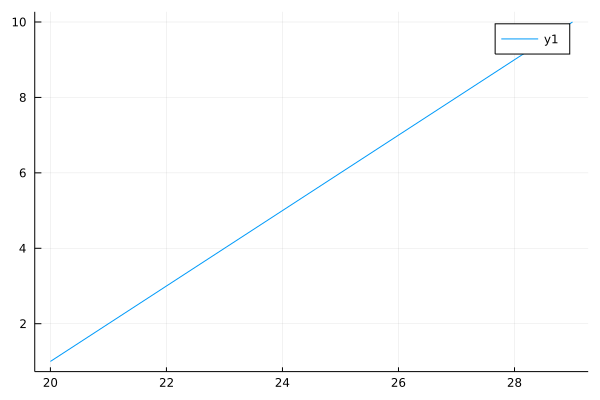

In [15]:
a = collect(1:10)
plot(20:29,a)

Problème maître restreint ($\mathcal C_L^R \subset  \mathcal C_L$) :
$$\begin{array}{rlccrlc}
\max        & \displaystyle\sum\limits_{c\in \mathcal C_L^R} z_c w_c  & & \iff &
\max        & \displaystyle\sum\limits_{c\in \mathcal C_L^R} z_c \sum_{(i,j) \in E}\bar x_{(i,j)}^c w_{(i,j)} \\
\text{sous} & \displaystyle\sum\limits_{c\in \mathcal C_L^R \,|\, i\in c} z_c \le 1 & \forall i\in V & &
\text{sous} & \displaystyle\sum\limits_{c\in \mathcal C_L^R} z_c \,\bar y_i^c \le 1 & \forall i\in V ~~~\big\vert~~(\pi_i)_{i\in V}\\
            & z \in [0,1]^{|\mathcal C_L^R|} & & & & z \in [0,1]^{|\mathcal C_L^R|}
\end{array}$$

où :
*  $\bar x_{(i,j)}^c = 1$ si l'arc $(i,j)$ se trouve dans le cycle $c$, et $\bar x_{(i,j)}^c = 0$ sinon
*  $\bar y_i^c = 1$ si le sommet $i$ fait partie du cycle $c$, et $\bar y_i^c = 0$ sinon

$~$  

Sous-problème :
$$\begin{array}{rlcrlc}
\max        & \displaystyle\sum\limits_{(i,j)\in E} x_{(i,j)}^c w_{(i,j)} - \sum\limits_{i\in V} \pi_i^* y_i^c & \iff &
\max        & \displaystyle\sum\limits_{(i,j)\in E} x_{(i,j)} w_{(i,j)} - \sum\limits_{i\in V} \pi_i^* y_i \\
\text{sous} & c\in\mathcal C_L & &
\text{sous} & \displaystyle\sum\limits_{(i,j) \in\delta^-(i)} x_{(i,j)} = y_i & \forall i\in V\\
      & & & & \displaystyle\sum\limits_{(j,i) \in\delta^+(i)} x_{(j,i)} = y_i & \forall i\in V\\
      & & & & \displaystyle\sum\limits_{(i,j) \in E} x_{(i,j)} \le L \\
      & & & & \displaystyle\sum\limits_{(i,j) \in E} x_{(i,j)} \ge 2 \\
      & & & & x \in \{0,1\}^{|E|}, y \in \{0,1\}^{|V|}
\end{array}$$

$~$  

Relaxation lagrangienne (avec $\lambda_i \ge 0$, $\forall i\in V$) :
$$\begin{array}{rlcrl}
\max        & \displaystyle\sum\limits_{c\in \mathcal C_L} z_c \big(\sum_{(i,j) \in E} \bar x_{(i,j)}^c w_{(i,j)}\big) + \sum\limits_{i\in V}\lambda_i \big(1 - \sum\limits_{c\in \mathcal C_L} z_c \, \bar y_i^c \big)\\
\text{sous} & z \in [0,1]^{|\mathcal C_L|}
\end{array}$$

$$\begin{aligned}\displaystyle\underset{z}{\max}~\sum\limits_{c\in \mathcal C_L} z_c \big(\sum_{(i,j) \in E} \bar x_{(i,j)}^c w_{(i,j)}\big) &+ \sum\limits_{i\in V}\lambda_i \big(1 - \sum\limits_{c\in \mathcal C_L} z_c \, \bar y_i^c \big)\\
~~~~~ &= \underset{z}{\max}~\sum\limits_{i\in V}\lambda_i + \sum\limits_{c\in \mathcal C_L} z_c \big(\sum_{(i,j) \in E} \bar x_{(i,j)}^c w_{(i,j)} - \sum\limits_{i\in V} \bar y_i^c \big)\\
~~~~~ &\le \underset{z}{\max}~\sum\limits_{i\in V}\lambda_i + {\bf u}_\text{SP}^*\sum\limits_{c\in \mathcal C_L} z_c \\
~~~~~ &\le \underset{z}{\max}~\sum\limits_{i\in V}\lambda_i + {\bf u}_\text{SP}^*\times M
\end{aligned}$$


où $\displaystyle{\bf u}_\text{SP}^* := \underset{c\in\mathcal C_L}{\max}~\sum\limits_{(i,j)\in E} x_{(i,j)}^c w_{(i,j)} - \sum\limits_{i\in V} \pi_i^* y_i^c~~$ (solution optimale du sous-problème)

et $M$ est un majorant de $\displaystyle\sum\limits_{c\in \mathcal C_L} z_c$ le nombre de cycles nécessaires finalement (on peut prendre $M=\frac{|V|}2$).

$$\sum\limits_{i\in V}\pi_i^* + M\times {\bf u}_\text{SP}^*$$